# Viterbi algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string

In [133]:
# load files
observations_fh = 'hw7_observations.txt'
transitionMtx_fh = 'hw7_transitionMatrix.txt'
emissionMtx_fh = 'hw7_emissionMatrix.txt'
initialState_fh = 'hw7_initialStateDistribution.txt'

observations = np.loadtxt(observations_fh, dtype='int') # O_t, binary
transition = np.loadtxt(transitionMtx_fh) # a_ij, 27x27
emission = np.loadtxt(emissionMtx_fh) # b_ik, 27x2
initialState = np.loadtxt(initialState_fh) # pi_i, 27x1

# values
n = 27 # number of hidden states from {1,2,...,27}
m = 2
T = 240000 # number of observations

# alphabet dict
alphaDict = dict(zip(range(1,28), string.ascii_lowercase + ' '))

# preallocate matrix l* (nxT)
l = np.empty([n,T])
# initialize first column of l*
l[:,0] = np.log(initialState) + np.log(emission[:, observations[0]])

# preallocate matrix Phi (nxT)
phi = np.empty([n,T])
# initialize first column of Phi
phi[:,0] = initialState

# initialize s* sequence
s = np.full(T, -1, dtype=int)

In [1]:
# functions

'''
update l* and phi
computes l*_(j,t+1), phi_(j,t+1)
row = j
col = t+1
'''
def update(row, col):
    state_transitions = l[:,col-1] + np.log(transition[:, row])
    most_likely = int(np.argmax(state_transitions)) # update phi
    new_l = np.amax(state_transitions) + np.log(emission[row, observations[col]]) # update l*
    return most_likely, new_l

'''
backtrack to compute s* = {s1*, s2*, ..., sT*}
return st* for t in T
indexes l and phi (global variables)
'''
def backtrack(t_idx):
    if t_idx==T-1:
        return int(np.argmax(l[:,T-1])) # T-1 to account for 0-based index
    else:
        return int(np.argmax(l[:,t_idx] + np.log(transition[:,s[t_idx+1]])))

''' run Viterbi algorithm '''
def Viterbi():
    # forward - filling Phi and l* matrix
    for t in xrange(T-1):
        for j in xrange(n):
            phi[j,t+1], l[j,t+1] = update(j,t+1)
    # backtrack
    for t in xrange(T-1,-1,-1):
        s[t] = int(backtrack(t))

''' plot most likely hidden states versus time '''
def plot_HMM():
    plt.plot(s)
    plt.title('Most likely sequence of hidden states versus time')
    plt.xlabel('time (t)')
    plt.ylabel('Hidden states (s_t)')

''' check answer by decoding hidden message '''
def decode():
    message = []
    for t in xrange(T-1):
        if s[t] != s[t+1]:
            message.append(alphaDict.get(s[t]+1))
    message.append(alphaDict.get(s[T-1]+1))
    return ''.join(message)

### Run Viterbi algorithm and update global variables l, phi and s

In [143]:
Viterbi()

### Plot hidden states at times points in T

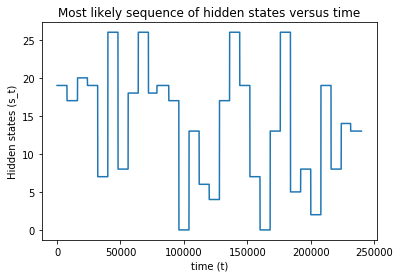

In [144]:
plot_HMM()

### Decode hidden message

In [156]:
hidden_message = decode()
print hidden_message

truth is stranger than fiction
